In [1]:
### This notebook plots bounds on par tests coefficients ###

In [2]:
import sys, os
from os import path, makedirs
import subprocess

## initialise path to posteriors (individual/combined folders)
path_to_posteriors='./'


In [3]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

import utils
from posteriors_utils import initialize, set_events_to_use, set_parameters_to_use
import pickle as pkl

In [4]:
import pandas as pd
import glob
import json

from scipy.stats import gaussian_kde
from scipy.special import logsumexp
from scipy import interpolate

# Utilities 

In [5]:
gwtc = ['GW150914','GW151226','GW170104','GW170608','GW170814']

In [6]:
def get_mc(eventid):
        
    e = utils.Event(eventid)
    
    try:
        mc = e.get_param('mc')
        
    except:
        mc = 1.0
        
        
    return mc

In [7]:
## Settings to combine posteriors (modify input/output paths accordingly)

settings = {
            'combinedposterior_samples' : 5000, # Number of samples to draw from the combined pdf
            'kde_cov_factor'    : 0.25,
            'kde_points'        : 1000,
            'input_path'        : os.path.join(path_to_posteriors,'individual/'),
            'output_path'       : os.path.join(path_to_posteriors,'combined/'),
            'bounds_path'       : os.path.join(path_to_posteriors,'bounds/'),
            'inspiral'          : True,
            'post-inspiral'     : True,
            'source_data_path'  : None,
            'waveform'          : 'phenom',
            'gwtc'              : 3,
}

In [15]:
set_events_to_use(settings)

Waveform     :  phenom
Regime       :  inspiral
Regime       :  post-inspiral
Using events : 
    GW150914
    GW151226
    GW170104
    GW170608
    GW170814
    GW190408A
    GW190412A
    GW190512A
    GW190521B
    GW190630A
    GW190707A
    GW190708A
    GW190720A
    GW190728A
    GW190814A
    GW190828A
    GW190828B
    GW190924A
    GW200316A
    GW200311B
    GW200225A
    GW200202A
    GW200129A
    GW200115
    GW191216A
    GW191204B
    GW191129A


# Load GWTC-2 data

- Data for GWTC-2 were regenerated

In [8]:
o3a_pkl=glob.glob(settings['bounds_path']+'**gwtc2.pkl',recursive=True)

In [9]:
settings['bounds_path']

'./bounds/'

In [10]:
o3a_pkl

['./bounds/UpperBounds_AbsoluteMagnitude_Combined_seob_inspiral_gwtc2.pkl',
 './bounds/UpperBounds_AbsoluteMagnitude_Combined_phenom_inspiral_gwtc2.pkl']

In [11]:
gwtc2_labels=[x.split('/')[-1].split('UpperBounds_AbsoluteMagnitude_')[-1].split('.pkl')[0] for x in o3a_pkl]

In [12]:
gwtc2_labels

['Combined_seob_inspiral_gwtc2', 'Combined_phenom_inspiral_gwtc2']

In [13]:
ul_gwtc2={gwtc2_labels[k]: pkl.load( open(o3a_pkl[k], 'rb')) for k in range(0, len(o3a_pkl)) }

In [14]:
ul_gwtc2

{'Combined_seob_inspiral_gwtc2': {'dphi-2': 0.0016622177733288872,
  'dphi0': 0.0442735528321114,
  'dphi1': 0.1337959581202824,
  'dphi2': 0.09061764467169889,
  'dphi3': 0.05848641434227028,
  'dphi4': 0.475797869942014,
  'dphi5l': 0.14918296675053427,
  'dphi6': 0.3613816519221923,
  'dphi6l': 1.646409923436951,
  'dphi7': 1.0483524064605154},
 'Combined_phenom_inspiral_gwtc2': {'dphi-2': 0.002326515704894087,
  'dphi0': 0.05103015928841759,
  'dphi1': 0.17237868499129766,
  'dphi2': 0.1120174228282336,
  'dphi3': 0.06707157608058519,
  'dphi4': 0.5194180667153647,
  'dphi5l': 0.15934628322015704,
  'dphi6': 0.3849592836079322,
  'dphi6l': 2.0849159970781597,
  'dphi7': 0.7756472688905118}}

# Load bounds for GW170817

In [15]:
bns_pkl=glob.glob(settings['bounds_path']+'*170817*.pkl',recursive=True)

In [16]:
labels=[x.split('/')[-1].split('UpperBounds_AbsoluteMagnitude_')[-1].split('.pkl')[0] for x in bns_pkl]

In [17]:
labels

['GW170817_PhenomPNRT', 'GW170817_SEOBNRT']

In [18]:
ul_bns={labels[k]: pkl.load( open(bns_pkl[k], 'rb')) for k in range(0, len(bns_pkl)) }

In [19]:
ul_bns

{'GW170817_PhenomPNRT': {'dphi-2': 1.910056446625911e-05,
  'dphi0': 0.3421820758027727,
  'dphi1': 0.0798284738694681,
  'dphi2': 0.11519672569317,
  'dphi3': 0.23998773601361828,
  'dphi4': 3.1910306819759464,
  'dphi5l': 0.877695508873479,
  'dphi6': 2.153824016616575,
  'dphi6l': 7.450745150499381,
  'dphi7': 8.797346035298109},
 'GW170817_SEOBNRT': {'dphi-2': 1.80508774744172e-05,
  'dphi0': 0.2979771588780663,
  'dphi1': 0.07282102339581283,
  'dphi2': 0.1046070424050298,
  'dphi3': 0.36415300458142896,
  'dphi4': 3.172681535958735,
  'dphi5l': 0.907918024627304,
  'dphi6': 2.71096924414812,
  'dphi6l': 7.1208107820649875,
  'dphi7': 18.44480909821769}}

# Load GWTC-3 data

In [20]:
o3b_pkl=glob.glob(settings['bounds_path']+'**gwtc3.pkl',recursive=True)

In [21]:
gwtc3_labels=[x.split('/')[-1].split('UpperBounds_AbsoluteMagnitude_')[-1].split('.pkl')[0] for x in o3b_pkl]

In [22]:
gwtc3_labels

['Combined_seob_inspiral_gwtc3', 'AllEvents_seob_inspiral_gwtc3']

In [23]:
ul_gwtc3={gwtc3_labels[k]: pkl.load( open(o3b_pkl[k], 'rb')) for k in range(0, len(o3b_pkl)) }

In [24]:
ul_gwtc3

{'Combined_seob_inspiral_gwtc3': {'dphi-2': 0.0007338419500581633,
  'dphi0': 0.05949748547346141,
  'dphi1': 0.15163541920298657,
  'dphi2': 0.10489678868057264,
  'dphi3': 0.06900323747170603,
  'dphi4': 0.5597557016475934,
  'dphi5l': 0.2157495333171008,
  'dphi6': 0.45468215963711456,
  'dphi6l': 1.9125815004193387,
  'dphi7': 0.9862362362362371},
 'AllEvents_seob_inspiral_gwtc3': {'GW150914': {'dphi-2': 0.012459356625984882,
   'dphi0': 0.21933392576770583,
   'dphi1': 0.9249318535619573,
   'dphi2': 0.6431217318345539,
   'dphi3': 0.4134800605191432,
   'dphi4': 3.1432948659905997,
   'dphi5l': 1.0916644556822934,
   'dphi6': 1.9464798604304605,
   'dphi6l': 12.850383714524071,
   'dphi7': 4.891812244897732},
  'GW151226': {'dphi-2': 0.0044779533261200405,
   'dphi0': 0.28884311717830213,
   'dphi1': 0.5714324346917858,
   'dphi2': 0.34937305513737615,
   'dphi3': 0.21708809931369644,
   'dphi4': 1.9650717079744,
   'dphi5l': 0.7455252947579556,
   'dphi6': 1.3204887465533255,
  

## Plot settings

In [28]:
cmap      = plt.cm.coolwarm
norm      = mcolors.TwoSlopeNorm(25, vmin=(5.0), vmax=(45.0));

In [29]:
# Specify some aesthetic colours...
dodgerblue      = '#1E90FF'
lawngreen       = '#7CFC00'
blueviolet      = '#8A2BE2'
caltechorange   = '#FF6C0C'
walesaway       = '#293133'
waleshome       = '#ff0038'
uniwienblue     = '#006699'
uniwiengrey     = '#666666'
emeraldgreen    = '#50C878'
tanzaniagreen   = '#1eb53a'
grey3           = '#565759'
grey1           = '#C0BEC6'
grey2           = '#AAA7B0'

In [30]:
gids      = settings['events']

params_pre = ['dphi%i' % n for n in range(5)] +\
             ['dphi5l', 'dphi6', 'dphi6l', 'dphi7']

In [31]:
def get_label(param):
    if param == 'dphi-2':
        l = r'${\varphi}_{-2}$'
    elif 'phi' in param:
        l =  param.replace('dphi', r'${\varphi}_{') + '}$'
    return l 

In [32]:
plt.rcParams.update(utils.rcParams)

In [33]:
kwargs ={
    
    'GWTC-3 (SEOB)':{
        'markeredgewidth': 1.5,
        'markersize': 8,
        'alpha': 1.,
        'marker': 'D',
        'markeredgecolor': 'none',
        'markerfacecolor': 'crimson',
        'ls': '',
    },
    'GWTC-2 (Phenom)':{
        'markeredgewidth': 0.7,
        'markersize': 7,
        'alpha': 0.8,
        'marker': '^',
        'markeredgecolor': 'black',
        'markerfacecolor': 'none',
        'ls': '',
    },
    'GWTC-2 (SEOB)':{
        'markeredgewidth': 0.7,
        'markersize': 7,
        'alpha': 0.8,
        'marker': '^',
        'alpha': 0.7,
        'markeredgecolor': 'none',
        'markerfacecolor': 'dimgray',
        'ls': '',
    },
    
    'GW170817 (SEOBNRT)':{
        'markeredgewidth': 0.5,
        'markersize': 12,
        'marker': '.',
        'color': 'dodgerblue',
        'markeredgecolor': 'none',
        'ls': '',
        
    },
    
    'GW170817 (PhenomPNRT)':{
        'markeredgewidth': 0.5,
        'markersize': 12,
        'marker': '.',
        'color': 'none',
        'markeredgecolor': 'dodgerblue',
        'ls': '',
        
    },
    'event': {
        'marker': '_',
        'ls': '',
        'markersize': 20,
        'alpha': 0.25,
        'markeredgewidth': 3,
    },
}


## Plot upper bounds

/work/yifan.wang/virtualenv/sgwb/lib/python3.7/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/work/yifan.wang/virtualenv/sgwb/lib/python3.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
posx and posy should be finite values


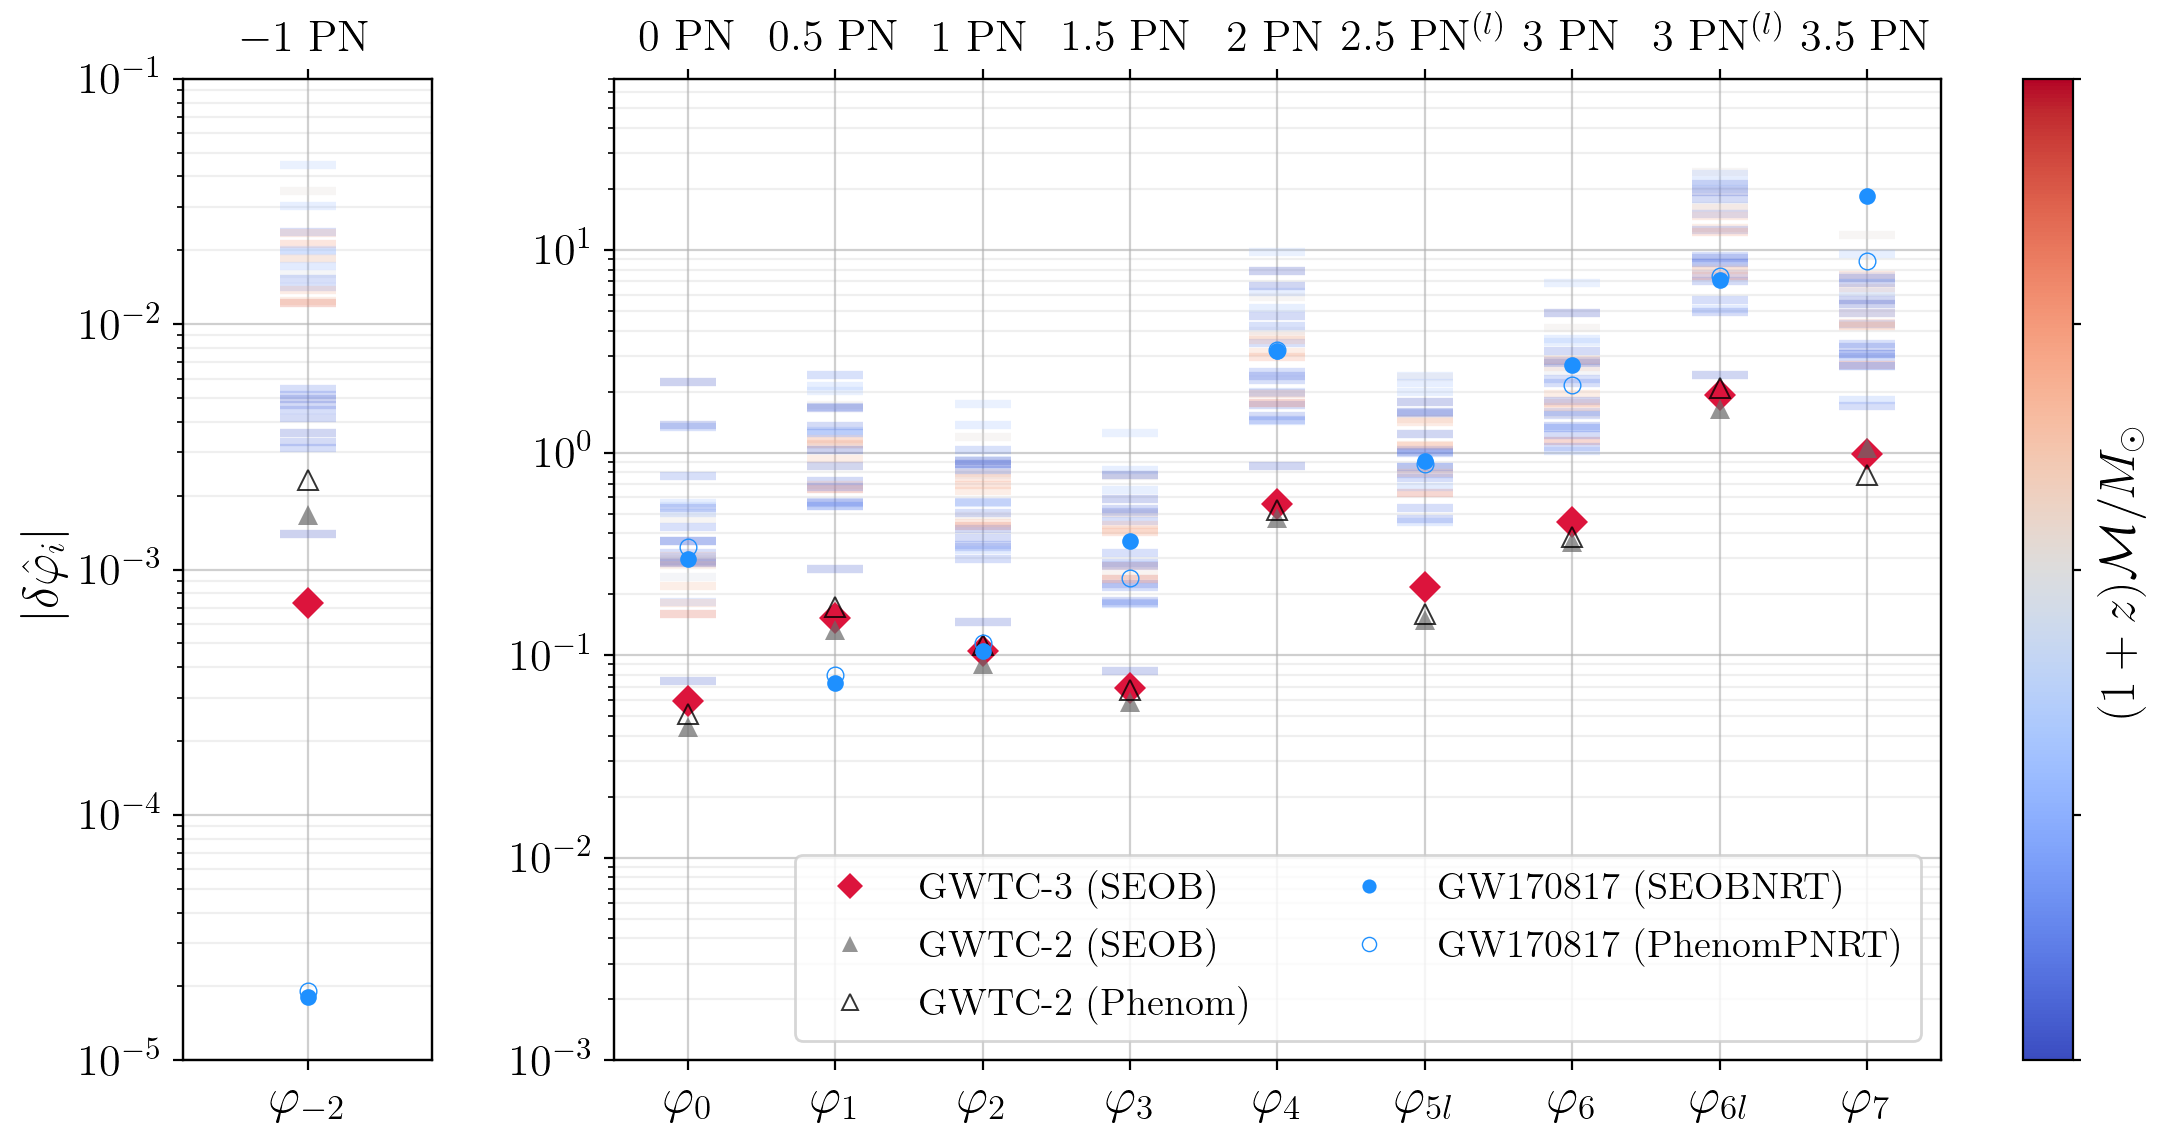

In [34]:

param_sets=[['dphi-2'],
 params_pre]


fig = plt.figure(figsize=(20,6.5), dpi=200)
plt.rcParams["legend.markerscale"] = 0.85
plt.rcParams["text.usetex"] = "true"
plt.rcParams['font.family'] = 'times-new-roman'

reference_data = {
    'GWTC-3 (SEOB)': ul_gwtc3['Combined_seob_inspiral_gwtc3'],
    'GWTC-2 (SEOB)':  ul_gwtc2['Combined_seob_inspiral_gwtc2'],
    'GWTC-2 (Phenom)':  ul_gwtc2['Combined_phenom_inspiral_gwtc2'],
    'GW170817 (SEOBNRT)': ul_bns['GW170817_SEOBNRT'],
    'GW170817 (PhenomPNRT)': ul_bns['GW170817_PhenomPNRT'],
}

# 1 rows and 2 columns with the required size ratios. 
gs = gridspec.GridSpec(1, 3, height_ratios=[2], width_ratios=[0.15,1,0.5])

# Plot
axs = []
for j, pset in enumerate(param_sets):
    ax = plt.subplot(gs[0,j])
    for i, par in enumerate(pset):
        data_dict = ul_gwtc3['AllEvents_seob_inspiral_gwtc3']
        # plot events
        for gid, data in data_dict.items():
            if par in data:
                mc=(get_mc(gid))
                c = cmap(norm(mc))
                ax.semilogy(i, data[par], c=c, **kwargs['event'])
        # plot reference data
        for k, data in reference_data.items():
            if par in data:
                ax.semilogy(i, data[par], **kwargs[k])
    axs.append(ax)

# Set x- and y-limits
axs[0].set_ylim(1e-5, 1e-1)
axs[0].set_xlim(-0.5, 0.5)
axs[1].set_ylim(1e-3, 7e1)
axs[1].set_xlim(-0.5, 8.5)

# Plot legend
from matplotlib.lines import Line2D
legend = {k: Line2D([0], [0], **kwargs[k]) for k in reference_data.keys()}
axs[1].legend(legend.values(), legend.keys(), loc='lower right',
              frameon=True, fontsize=14,ncol=2)
    
# ylabel
axs[0].set_ylabel(r'$|\delta\hat{\varphi}_i|$')

# set x-ticks and grid
for ax, ps in zip(axs, param_sets):
    # ticks
    ax.set_xticks(np.arange(len(ps)))
    ax.set_xticklabels([get_label(p) for p in ps], fontsize=18)
    ax.tick_params(axis='y', labelsize=16)
    # grid 
    ax.grid(which='major',axis='both', b=True, linestyle='-',alpha=0.6)
    ax.grid(which='minor',b=True, linestyle='-',alpha=0.2)

# add colorbar
ax = axs[1]
sm   = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.linspace(5, 65, 7))
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=16)
cbar.ax.tick_params('y', length=3, which='major')
cbar.set_label(r'$%s$' % utils.Parameter('mc').latex, fontsize=18, labelpad=2.5)

# add twin abscissa on top
xticks_top = [
    ['$-1$ PN'],
    ['$0$ PN', '$0.5$ PN', '$1$ PN', '$1.5$ PN', '$2$ PN',
     '$2.5$ PN$^{(l)}$', '$3$ PN', '$3$ PN$^{(l)}$', '$3.5$ PN'],
]
for ax, xt in zip(axs, xticks_top):
    twin_ax = ax.twiny()
    twin_ax.set_xticks(ax.get_xticks())
    twin_ax.set_xticklabels(xt, fontsize=16)
    twin_ax.set_xlim(ax.get_xlim())

plt.savefig('./par_bounds_seob.pdf', bbox_inches='tight')
plt.show()